<a href="https://colab.research.google.com/github/OnkarSavadi/Data_Analytics_Projects/blob/main/Yulu_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importing Data & Libraries**

In [165]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats

from scipy.stats import ttest_rel,ttest_ind,ttest_1samp
from scipy.stats import chi2_contingency, chisquare
from scipy.stats import f_oneway, kruskal, shapiro, levene
from scipy.stats import spearmanr
from statsmodels.graphics.gofplots import qqplot

In [123]:
!gdown 1T2ibpd2XtkI_kdd718uUqX_55aBL5CuK

Downloading...
From: https://drive.google.com/uc?id=1T2ibpd2XtkI_kdd718uUqX_55aBL5CuK
To: /content/bike_sharing.csv
100% 648k/648k [00:00<00:00, 52.6MB/s]


In [124]:
df = pd.read_csv('/content/bike_sharing.csv')

In [125]:
df_og = df.copy() # Saving the original dataset

In [126]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# **2 Checking the Dataset**

In [127]:
df.shape

(10886, 12)

In [128]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [130]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

**Insight:**


* There are 10886 rows and 12 features  
* There are no null values in the dataset.

## **2.1 Changing Data type for columns**

In [131]:
# Renaming season column

def season(s):
  if s==1:
    return 'Spring'
  if s==2:
    return 'Summer'
  if s==3:
    return 'Fall'
  if s==4:
    return 'Winter'

# Renaming weather column

def weather(s):
  if s==1:
    return 'Clear'
  if s==2:
    return 'Cloudy'
  if s==3:
    return 'Light Rain'
  if s==4:
    return 'Heavy Rain'

In [132]:
df['season'] = df.season.apply(season)

In [133]:
df['holiday'] = df.holiday.apply(lambda x: 'holiday' if x == 1 else 'no_holiday')

In [134]:
df['workingday'] = df.workingday.apply(lambda x: 'working_day' if x == 1 else 'weekend/holiday')

In [135]:
df['weather'] = df.weather.apply(weather)

In [136]:
# Converting 'datetime' column to datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Converting 'season', 'holiday', 'workingday' columns to category

col = ['season', 'holiday', 'workingday', 'weather']

for i in col:
  df[col] = df[col].astype('category')

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [138]:
df.duplicated().sum()

0

## **2.2 Sanity Check for all Columns**

In [139]:
for col in df.columns:
  print("Unique Values in: ", col)
  print(df[col].unique())
  print("-" * 75)

Unique Values in:  datetime
<DatetimeArray>
['2011-01-01 00:00:00', '2011-01-01 01:00:00', '2011-01-01 02:00:00',
 '2011-01-01 03:00:00', '2011-01-01 04:00:00', '2011-01-01 05:00:00',
 '2011-01-01 06:00:00', '2011-01-01 07:00:00', '2011-01-01 08:00:00',
 '2011-01-01 09:00:00',
 ...
 '2012-12-19 14:00:00', '2012-12-19 15:00:00', '2012-12-19 16:00:00',
 '2012-12-19 17:00:00', '2012-12-19 18:00:00', '2012-12-19 19:00:00',
 '2012-12-19 20:00:00', '2012-12-19 21:00:00', '2012-12-19 22:00:00',
 '2012-12-19 23:00:00']
Length: 10886, dtype: datetime64[ns]
---------------------------------------------------------------------------
Unique Values in:  season
['Spring', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Fall', 'Spring', 'Summer', 'Winter']
---------------------------------------------------------------------------
Unique Values in:  holiday
['no_holiday', 'holiday']
Categories (2, object): ['holiday', 'no_holiday']
---------------------------------------------------------------

## **2.3 Statistical Summary**

In [140]:
df.describe(include = 'category')

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,Winter,no_holiday,working_day,Clear
freq,2734,10575,7412,7192


In [141]:
df.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


## **2.4 Graphical Analysis**

### **2.4.1 Analysing Categorical Columns**

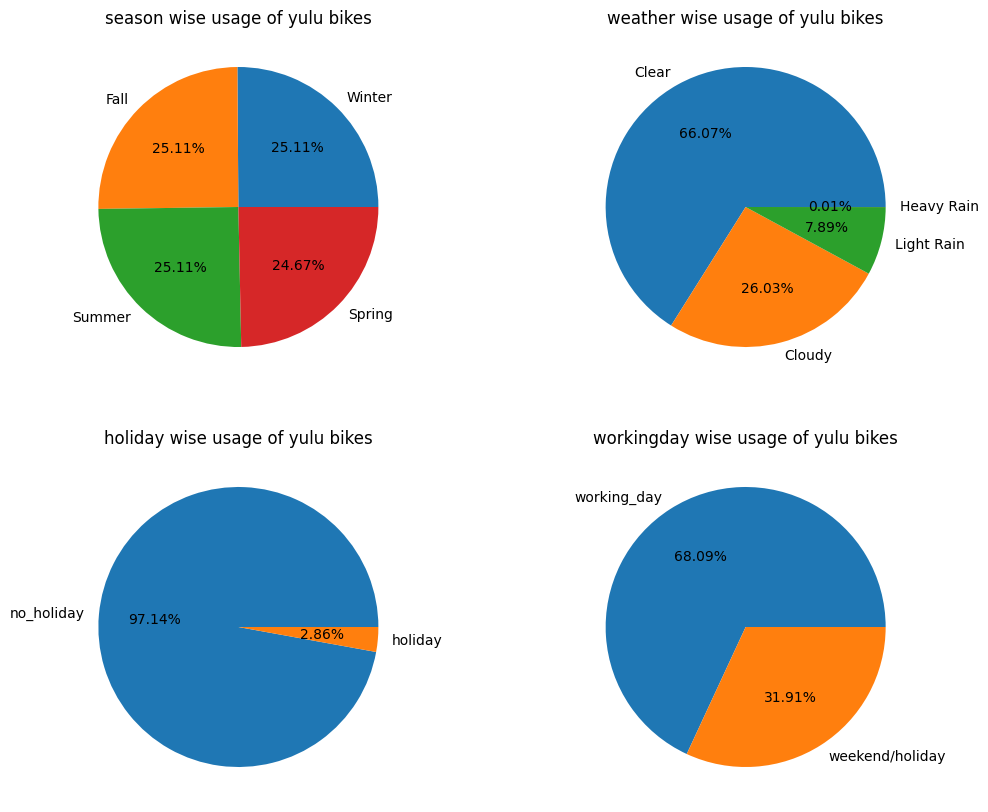

In [142]:
col = ['season', 'weather', 'holiday', 'workingday']

plt.figure(figsize=(12,10))
for i in range(len(col)):
  plt.subplot(2,2,i+1)
  plt.pie(df[col[i]].value_counts().values, labels = df[col[i]].value_counts().index, radius=1, autopct='%1.2f%%')
  plt.title(f'{col[i]} wise usage of yulu bikes')

### **2.4.1 Converting Temperature to Categorical Column**

In [143]:
temp_bin = [0,13,21,30,50]
temp_label = ['low', 'moderate', 'moderate-high', 'high']

df['temp_group'] = pd.cut(df['temp'], bins = temp_bin, labels = temp_label)
df['temp_group'] = df['temp_group'].astype('category')

df['temp_group'].value_counts()

temp_group
moderate-high    4007
moderate         3478
low              2157
high             1244
Name: count, dtype: int64

In [144]:
df['atemp_group'] = pd.cut(df['atemp'], bins = temp_bin, labels = temp_label)
df['atemp_group'] = df['atemp_group'].astype('category')

df['atemp_group'].value_counts()

atemp_group
moderate-high    3564
high             3250
moderate         2616
low              1456
Name: count, dtype: int64

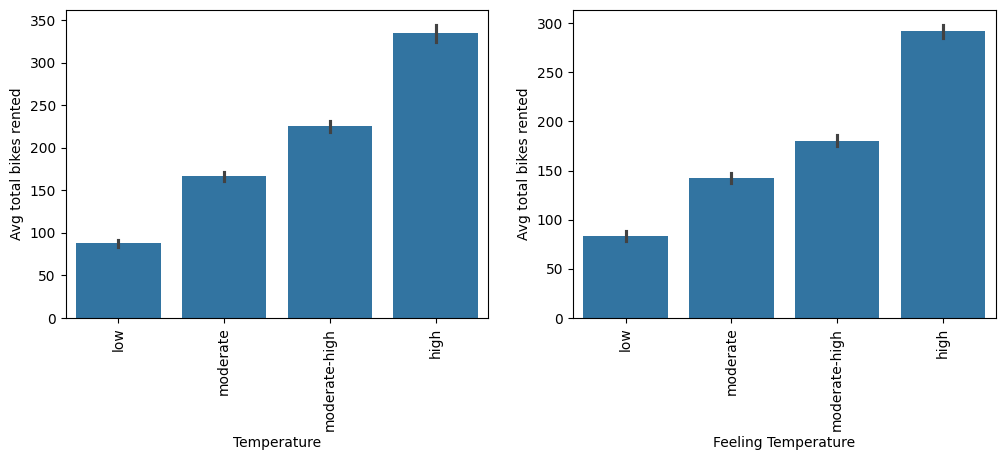

In [145]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(data=df, x='temp_group', y='count', estimator='mean')
plt.ylabel('Avg total bikes rented')
plt.xlabel('Temperature')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(data=df, x='atemp_group', y='count', estimator='mean')
plt.xticks(rotation=90)
plt.ylabel('Avg total bikes rented')
plt.xlabel('Feeling Temperature')
plt.show()

### **2.4.2 Checking for Outliers**

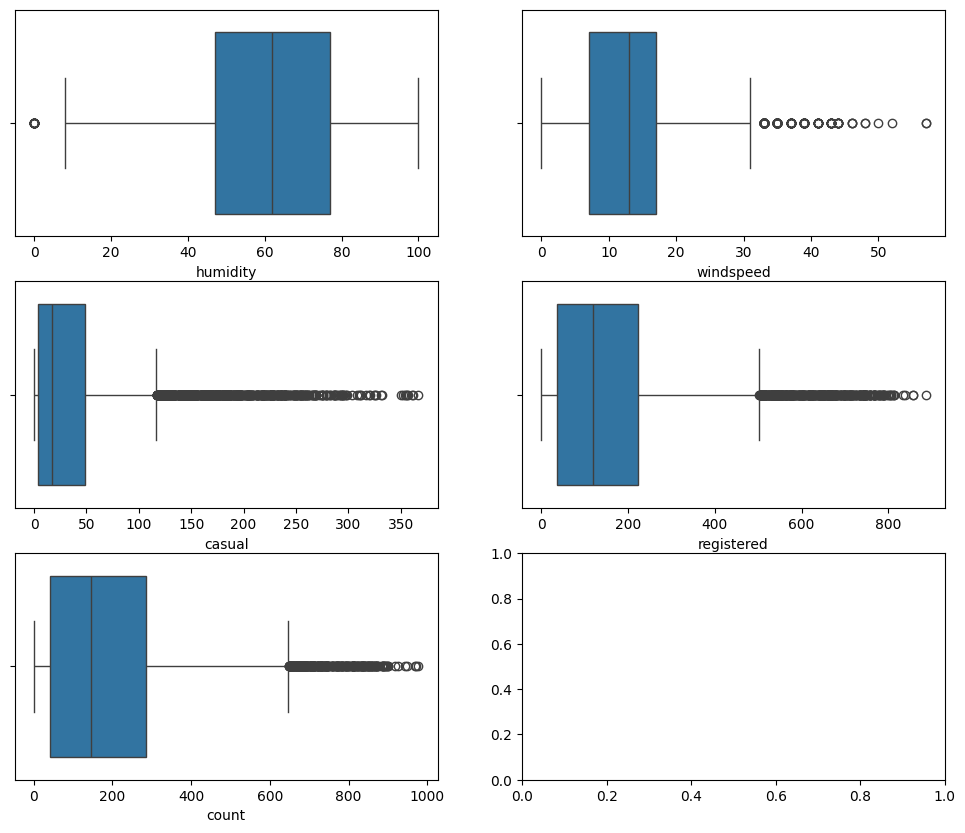

In [146]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

sns.boxplot(data = df, x = "humidity", ax=axis[0,0])

sns.boxplot(data = df, x = 'windspeed', ax=axis[0,1])

sns.boxplot(data = df, x = 'casual', ax=axis[1,0])

sns.boxplot(data = df, x = 'registered', ax=axis[1,1])

sns.boxplot(data = df, x = 'count', ax=axis[2,0])

plt.show()

In [147]:
# Get Numerical columns

num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

In [148]:
def Get_Numerical_Outlier_indices(df, cols):
    out_ind = []
    for col in cols:
        q1 = df[col].quantile(0.25)
        q2 = df[col].quantile(0.75)
        iqr = q2-q1
        rare_ind = df[((df[col]<(q1-(1.5*iqr)))|(df[col]>(q2+(1.5*iqr))))].index
        out_ind.extend(rare_ind)

    out_ind = set(out_ind)
    return out_ind

numerical_outlier_indices = Get_Numerical_Outlier_indices(df, num_cols)


In [149]:
outlier_len = len(numerical_outlier_indices)   #number of outliers in dataset
orig_len =  len(df)
print(f'original length of data: {orig_len}')
print(f'outliers length: {outlier_len}')

original length of data: 10886
outliers length: 1368


In [150]:
df = df.drop(numerical_outlier_indices)

df.shape

(9518, 14)

### **2.4.3 After Removing the Outliers**

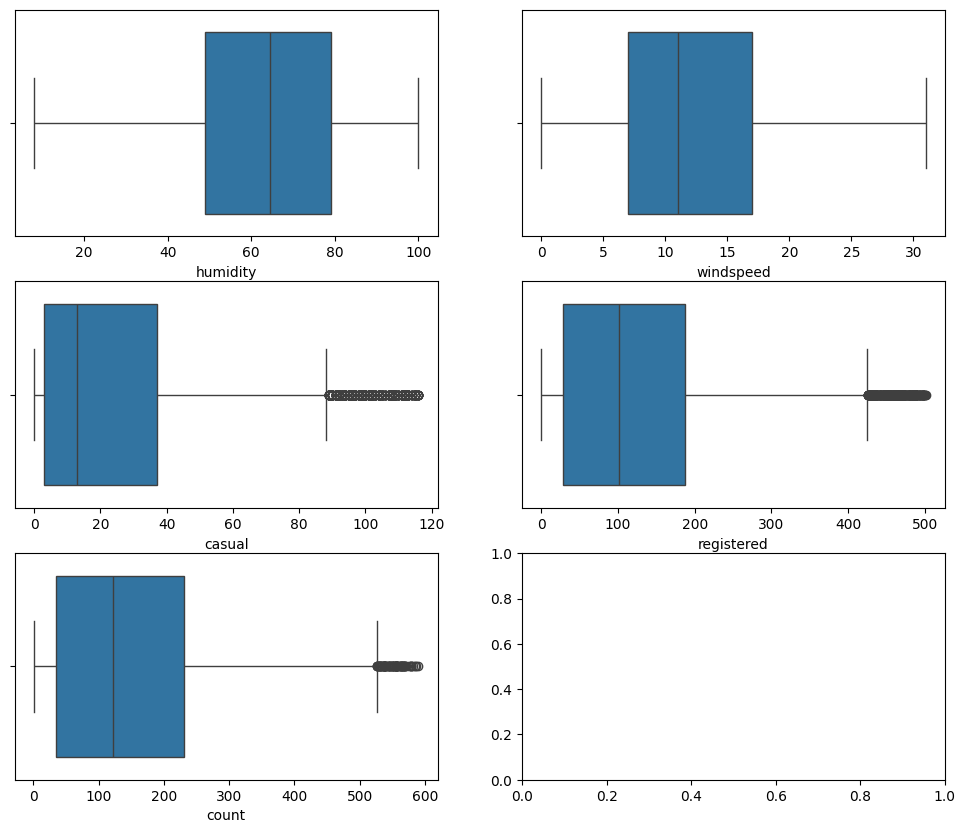

In [151]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

sns.boxplot(data = df, x = "humidity", ax=axis[0,0])

sns.boxplot(data = df, x = 'windspeed', ax=axis[0,1])

sns.boxplot(data = df, x = 'casual', ax=axis[1,0])

sns.boxplot(data = df, x = 'registered', ax=axis[1,1])

sns.boxplot(data = df, x = 'count', ax=axis[2,0])

plt.show()

# **3. Relationship between Dependent and Independent Variables**

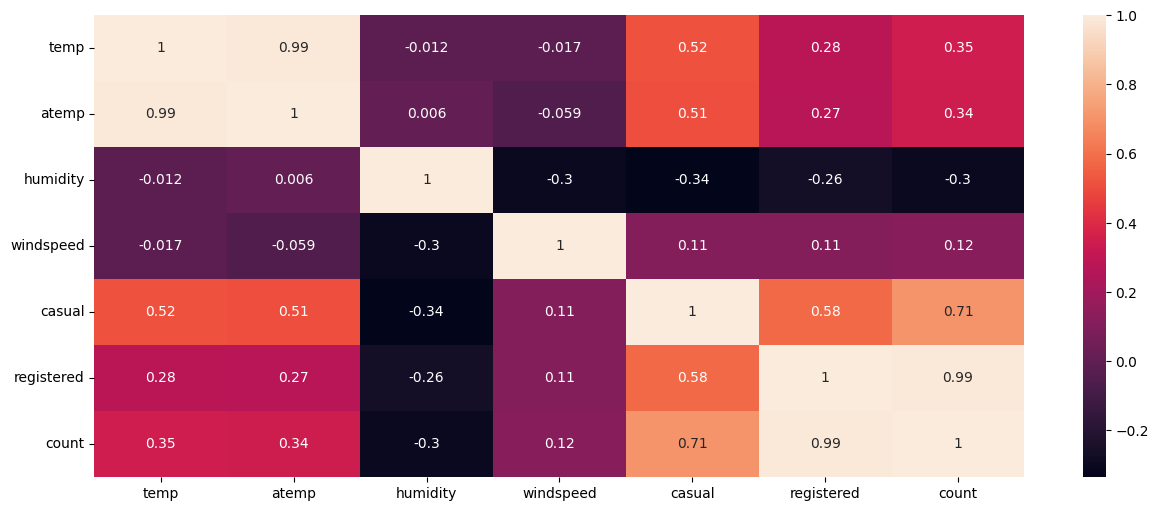

In [152]:
a = df.corr(numeric_only= True)

plt.figure(figsize=(15,6))
sns.heatmap(data = a, annot = True)

plt.show()

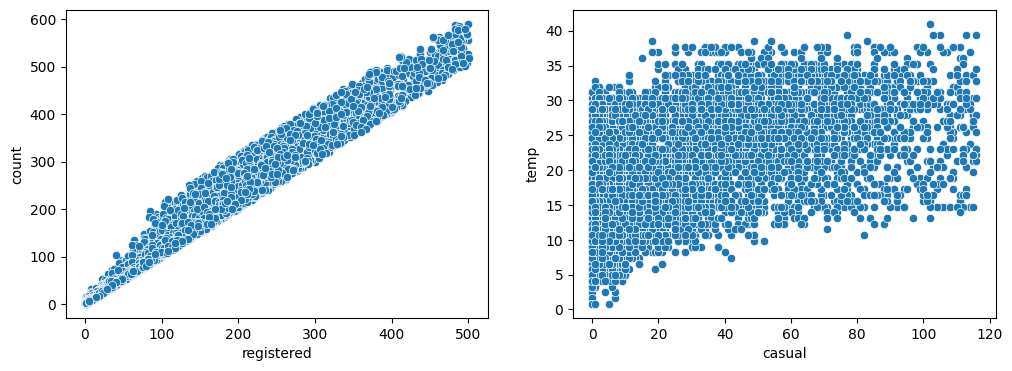

In [153]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.scatterplot(x = df['registered'], y = df['count'], ax=axis[0] )

sns.scatterplot(x = df['casual'], y = df['temp'], ax=axis[1])

plt.show()

# **4. Hypothesis Testing**

## **4.1 Weekdays vs Weekends**

Checking if there any significant difference between the no. of bike rides on Weekdays
and Weekends?



*   **H0:** Working day has no effect on number of bike rides
*   **H1:** Working day has significant effect on number of bike rides



**Statistical Summary**

In [154]:
df.groupby('workingday')['count'].agg(['mean','sum', 'std'])

,mean,sum,std
workingday,,,
weekend/holiday,120.681085,329218,106.747811
working_day,161.970103,1099777,138.588572


In [155]:
working = df[df['workingday']=='working_day']
nonworking = df[df['workingday']=='weekend/holiday']

In [156]:
alpha = 0.05

stats, p = ttest_ind(working['count'], nonworking['count'], alternative = "greater") # 2-Sample Independent t-test

print(f'p-value: {p}')

if p < alpha:
    print('Reject Null hypothesis: Working day has significant effect on number of bike rides')
else:
    print('Fail to reject Null hypothesis: Working day has no effect on number of bike rides')

p-value: 2.6924480901178837e-44
Reject Null hypothesis: Working day has significant effect on number of bike rides


## **4.2 Seasons vs Demand for Yulu**

Checking if the demand of e-bikes on rent is the same for different Weather conditions



*   **H0:** Demand is same for all seasons
*   **H1:** Demand is different same for all seasons


In [200]:
df.groupby('season')[['count', 'registered', 'casual']].agg(['sum', 'mean'])

count             registered             casual           
           sum        mean        sum        mean    sum       mean
season                                                             
Fall    405323  177.151661     324740  141.931818  80583  35.219843
Spring  254093  103.164028     225283   91.466910  28810  11.697117
Summer  367547  160.360820     298696  130.321117  68851  30.039703
Winter  402032  162.437172     352272  142.332121  49760  20.105051

In [158]:
alpha = 0.05

### **Checking Assumptions for the Test**

In [159]:
# Check if data is normally distributed

# h0: data is normally distributed
# ha: data is not normally distributed

summer = df[df['season']=='Summer']
winter = df[df['season']=='Winter']
fall = df[df['season']=='Fall']
spring = df[df['season']=='Spring']

shapiro(summer['count']), shapiro(winter['count']), shapiro(fall['count']), shapiro(spring['count'])

(ShapiroResult(statistic=0.9176210165023804, pvalue=1.2426929547549821e-33),
 ShapiroResult(statistic=0.9272552728652954, pvalue=4.5287389233367154e-33),
 ShapiroResult(statistic=0.9323311448097229, pvalue=5.115096899524057e-31),
 ShapiroResult(statistic=0.8594179153442383, pvalue=2.0725204287364044e-42))

**Since p-value is less than 0.05 we can say that the data is not normally distributed**

### **Histogram, Q-Q Plot, Skewness & Kurtosis**

In [160]:
summer = df[df['season']=='Summer']['count']
winter = df[df['season']=='Winter']['count']
fall = df[df['season']=='Fall']['count']
spring = df[df['season']=='Spring']['count']

In [161]:
# Defininng Normality Plot Function

def normality_plot(df):
  fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
  sns.histplot(df, ax=axis[0], bins = 20, kde = True)

  qqplot(df, line="s", ax=axis[1])

  plt.show()


In [166]:
# Defining Kurtosis-Skew funtion

def kurtosis_skew(df):
  k = stats.kurtosis(df)
  if k > 3:
    print(f'The distribution is tall and thin (Kurtosis: {k} > 3)')
  if k < 3:
    print(f'The distribution is flat and moderately spread out (Kurtosis: {k} < 3)')
  if k == 3:
    print(f'The distribution is normal (Kurtosis: {k} = 3)')

  s = stats.skew(df)
  if -0.5 < s < 0.5:
    print(f'The distribution is normal (Skew: {s}')
  if -1 < s <= -0.5:
    print(f'The distribution is moderately skewed (Skew: {s})')
  if 0.5 <= s < 1:
    print(f'The distribution is moderately skewed (Skew: {s})')
  if s > 1 or s < -1:
    print(f'The distribution is highly skewed (Skew: {s})')


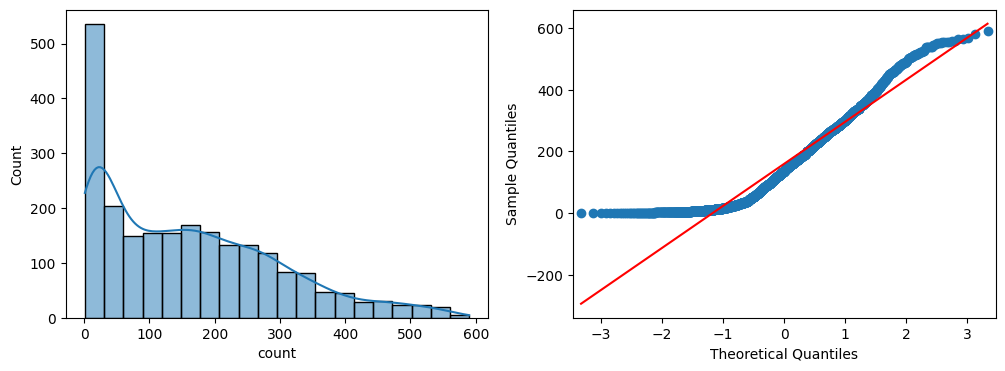

The distribution is flat and moderately spread out (Kurtosis: -0.10868680504449912 < 3)
The distribution is moderately skewed (Skew: 0.779796604548657)


In [167]:
normality_plot(summer)
kurtosis_skew(summer)

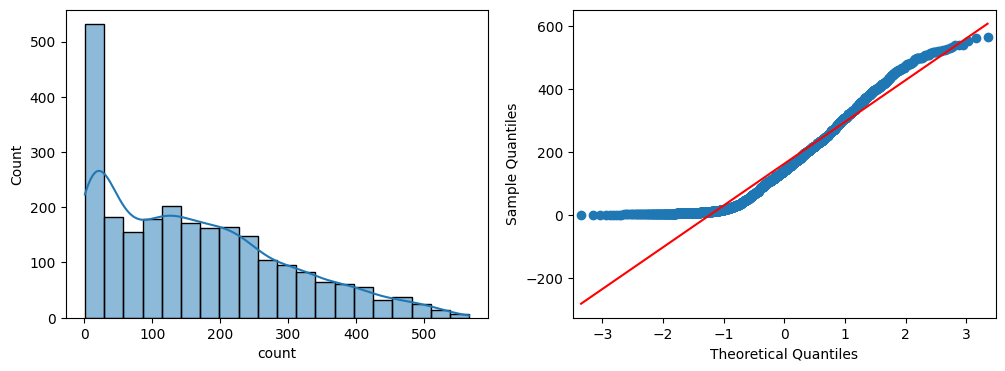

The distribution is flat and moderately spread out (Kurtosis: -0.3091287011796875 < 3)
The distribution is moderately skewed (Skew: 0.702651812931851)


In [168]:
normality_plot(winter)
kurtosis_skew(winter)

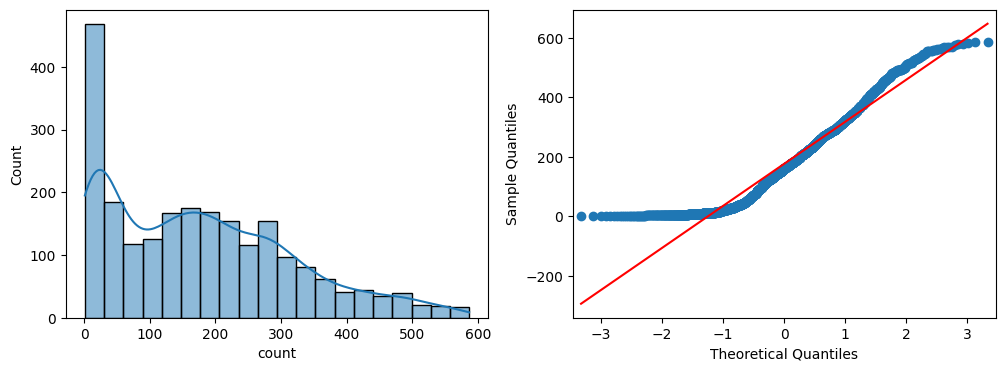

The distribution is flat and moderately spread out (Kurtosis: -0.29916266297451477 < 3)
The distribution is moderately skewed (Skew: 0.6604715346579652)


In [169]:
normality_plot(fall)
kurtosis_skew(fall)

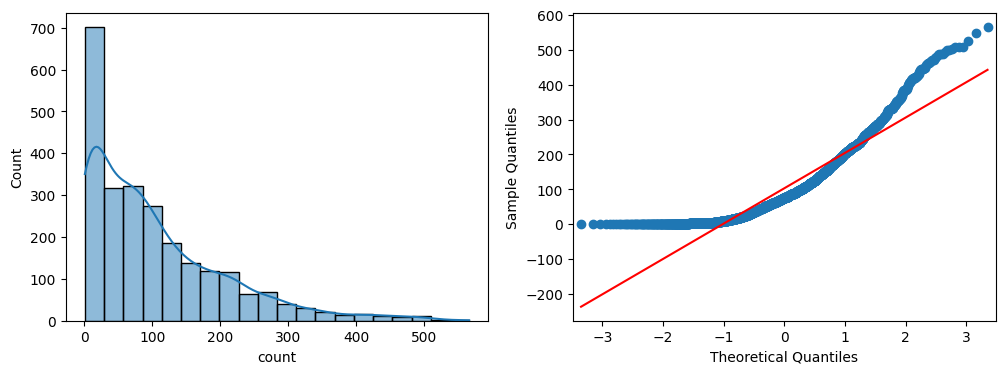

The distribution is flat and moderately spread out (Kurtosis: 2.051304237496603 < 3)
The distribution is highly skewed (Skew: 1.4256800374639509)


In [170]:
normality_plot(spring)
kurtosis_skew(spring)

### **Levene Test**

In [171]:
# H0: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(summer, winter, fall, spring)
if p_value < alpha:
    print("Variances are not equal")
else:
  print("Variances are equal")

Variances are not equal


### **One way ANOVA test**

In [172]:
summer = df[df['season']=='Summer']['count']
winter = df[df['season']=='Winter']['count']
fall = df[df['season']=='Fall']['count']
spring = df[df['season']=='Spring']['count']

In [173]:
f_stats, p_value = f_oneway(summer, winter, fall, spring)

print("test statistic:",f_stats)
print("p_value:", p_value)

test statistic: 155.83821650550502
p_value: 1.328514170995064e-98


In [174]:
if p_value < alpha:
    print('Reject Null hypothesis: Bike usage depends on season')
else:
    print('Fail to Reject Null hypothesis: Bike usage is independent of season ')

Reject Null hypothesis: Bike usage depends on season


## **4.3 Weather vs Demand for Yulu**

Checking if the demand of bicycles on rent is the same for different Weather
conditions.


*   **H0:** Demand is same for all weather
*   **H1:** Demand is different same for all weather



In [203]:
df.groupby('weather')[['count', 'registered', 'casual']].agg(['sum', 'mean'])

count             registered              casual           
               sum        mean        sum        mean     sum       mean
weather                                                                 
Clear       972856  157.522021     812903  131.622895  159953  25.899126
Cloudy      376997  146.805685     319241  124.315031   57756  22.490654
Heavy Rain     164  164.000000        158  158.000000       6   6.000000
Light Rain   78978  102.170763      68689   88.860285   10289  13.310479

In [176]:
alpha = 0.05

### **Checking Assumptions for the Test**

In [177]:
# Check if data is normally distributed

# h0: data is normally distributed
# ha: data is not normally distributed

clear = df[df['weather']=='Clear']
cloudy = df[df['weather']=='Cloudy']
lightRain = df[df['weather']=='Light Rain']
heavyRain = df[df['weather']=='Heavy Rain']

In [180]:
shapiro(clear['count']), shapiro(cloudy['count']), shapiro(lightRain['count'])

(ShapiroResult(statistic=0.9150597453117371, pvalue=0.0),
 ShapiroResult(statistic=0.91085284948349, pvalue=2.1035535621065664e-36),
 ShapiroResult(statistic=0.8443405628204346, pvalue=7.518643302497174e-27))

**Since p-value is less than 0.05 we can say that the data is not normally distributed**

### **Histogram, Q-Q Plot, Skewness & Kurtosis**

In [181]:
clear = df[df['weather']=='Clear']['count']
cloudy = df[df['weather']=='Cloudy']['count']
lightRain = df[df['weather']=='Light Rain']['count']
heavyRain = df[df['weather']=='Heavy Rain']['count']

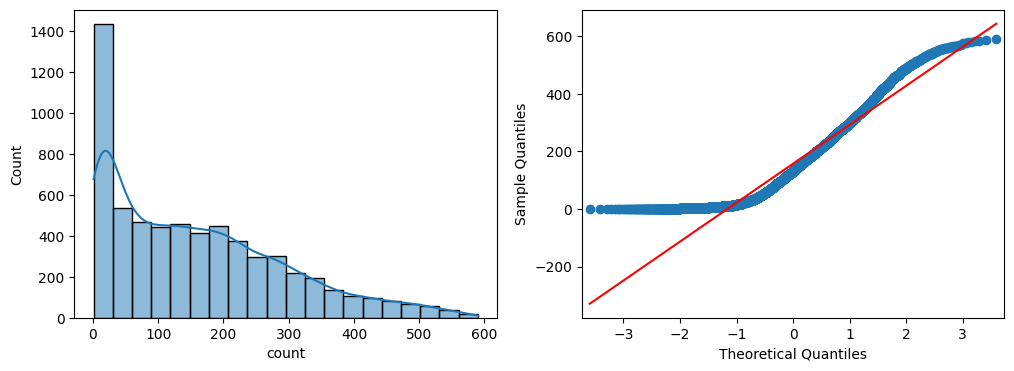

The distribution is flat and moderately spread out (Kurtosis: -0.02630509771840117 < 3)
The distribution is moderately skewed (Skew: 0.8256728710085347)


In [183]:
normality_plot(clear)
kurtosis_skew(clear)

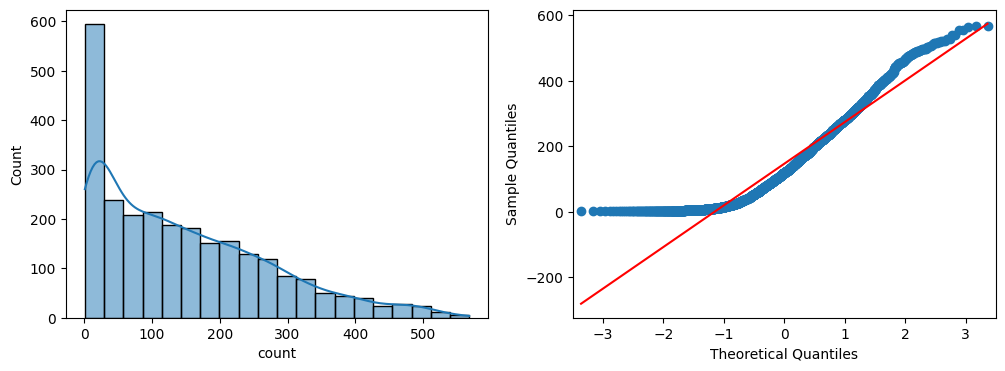

The distribution is flat and moderately spread out (Kurtosis: 0.08997334454087769 < 3)
The distribution is moderately skewed (Skew: 0.8782720514882909)


In [184]:
normality_plot(cloudy)
kurtosis_skew(cloudy)

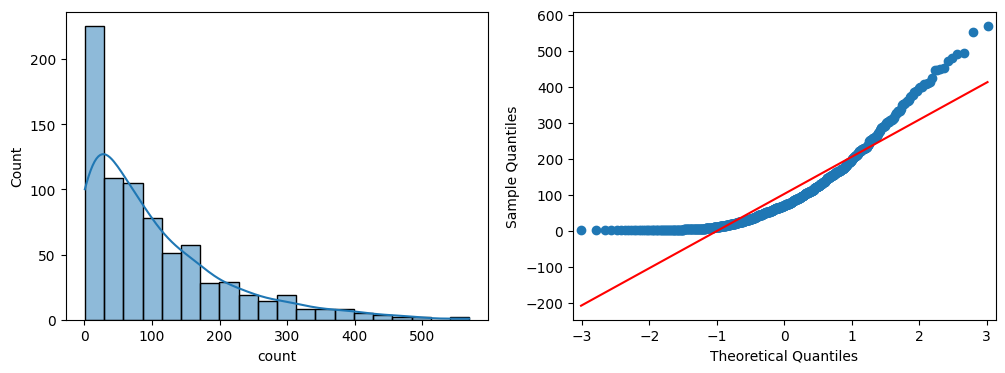

The distribution is flat and moderately spread out (Kurtosis: 2.262161515931262 < 3)
The distribution is highly skewed (Skew: 1.5118437612190248)


In [185]:
normality_plot(lightRain)
kurtosis_skew(lightRain)

### **Levene Test**

In [187]:
# H0: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(clear, cloudy, lightRain)
if p_value < alpha:
    print("Variances are not equal")
else:
  print("Variances are equal")

Variances are not equal


### **One way ANOVA test**

In [188]:
f_stats, p_value = f_oneway(clear, cloudy, lightRain)

print("test statistic:",f_stats)
print("p_value:", p_value)

test statistic: 62.70255115766609
p_value: 8.841710069607572e-28


In [189]:
if p_value < alpha:
    print('Reject Null hypothesis: Bike usage depends on weather condition')
else:
    print('Fail to Reject Null hypothesis: Bike usage is independent of weather condition')

Reject Null hypothesis: Bike usage depends on weather condition
